In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_web_laststep_timespent.csv")

In [12]:
df


,client_id,visitor_id,visit_id,process_step,date_time,Variation,last_step,time_spent
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,step_3,00:10:45
1,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,Test,confirm,00:01:59
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control,confirm,00:25:03
3,1982004,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17 12:02:42,Test,confirm,00:03:00
4,9294070,489274391_63794562906,116640698_27328181095_188045,start,2017-04-17 11:16:28,Control,start,00:00:15
...,...,...,...,...,...,...,...,...
158090,2443347,818414719_69544570654,148166449_67114410166_524360,confirm,2017-05-30 19:18:18,NaN,confirm,00:00:00
158091,9895983,473024645_56027518531,498981662_93503779869_272484,confirm,2017-06-15 19:55:09,NaN,confirm,00:11:04
158092,9563467,358754208_29929976792,172141804_88150434297_748843,step_1,2017-05-18 08:38:37,NaN,step_1,00:01:08
158093,9668240,388766751_9038881013,922267647_3096648104_968866,confirm,2017-05-24 19:07:35,NaN,confirm,00:23:01


In [13]:
# Create function to change type of time_spent to numeric
def convert_time_spent(df):
    df['time_spent'] = pd.to_datetime(df['time_spent'], format='%H:%M:%S').dt.time
    df['time_spent'] = df['time_spent'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
    return df

df = convert_time_spent(df)

In [14]:
df

,client_id,visitor_id,visit_id,process_step,date_time,Variation,last_step,time_spent
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,step_3,645
1,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,Test,confirm,119
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control,confirm,1503
3,1982004,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17 12:02:42,Test,confirm,180
4,9294070,489274391_63794562906,116640698_27328181095_188045,start,2017-04-17 11:16:28,Control,start,15
...,...,...,...,...,...,...,...,...
158090,2443347,818414719_69544570654,148166449_67114410166_524360,confirm,2017-05-30 19:18:18,NaN,confirm,0
158091,9895983,473024645_56027518531,498981662_93503779869_272484,confirm,2017-06-15 19:55:09,NaN,confirm,664
158092,9563467,358754208_29929976792,172141804_88150434297_748843,step_1,2017-05-18 08:38:37,NaN,step_1,68
158093,9668240,388766751_9038881013,922267647_3096648104_968866,confirm,2017-05-24 19:07:35,NaN,confirm,1381


In [15]:
df_group_by_variation = df.groupby(['last_step','Variation'])['time_spent'].mean()
df_group_by_variation

last_step  Variation
confirm    Control      388.532587
           Test         361.970253
start      Control      160.938331
           Test         255.681736
step_1     Control      193.569218
           Test         210.976380
step_2     Control      193.039808
           Test         251.620950
step_3     Control      319.720289
           Test         390.317362
Name: time_spent, dtype: float64

In [16]:
df_group_by_variation_count = df.groupby(['last_step','Variation'])['time_spent'].mean()
df_group_by_variation_count

last_step  Variation
confirm    Control      388.532587
           Test         361.970253
start      Control      160.938331
           Test         255.681736
step_1     Control      193.569218
           Test         210.976380
step_2     Control      193.039808
           Test         251.620950
step_3     Control      319.720289
           Test         390.317362
Name: time_spent, dtype: float64

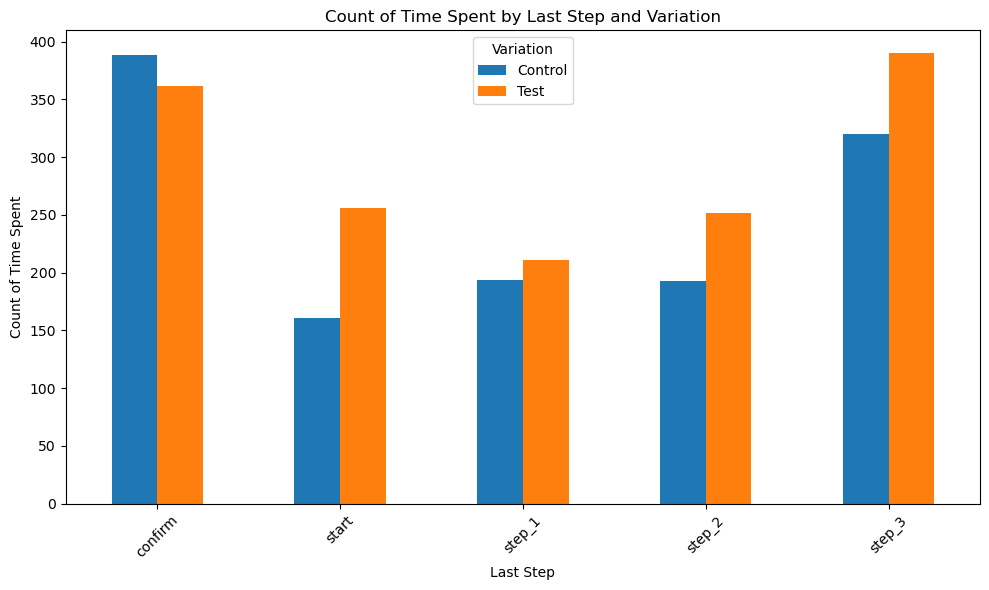

In [17]:
# visualize df_group_by_variation_count
import matplotlib.pyplot as plt
df_group_by_variation_count.unstack().plot(kind='bar', figsize=(10,6))
plt.title('Count of Time Spent by Last Step and Variation')
plt.xlabel('Last Step')
plt.ylabel('Count of Time Spent')
plt.xticks(rotation=45)
plt.legend(title='Variation')
plt.tight_layout()
plt.show()


In [18]:
df2 = pd.read_csv("/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_web_experiment_repeated_steps.csv")    

/var/folders/wc/048rx86x7bqbzmjn7nr46j_80000gn/T/ipykernel_2304/3326192232.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_web_experiment_repeated_steps.csv")


In [21]:
df2

,client_id,visitor_id,visit_id,process_step,date_time,Variation,repeated_step,step_repeated
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,1,step_3
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,1,step_2
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,1,step_3
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,1,step_2
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,1,step_3
...,...,...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN,1,start
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN,1,start
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN,1,step_1
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN,1,start


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


errors = df2.groupby(['step_repeated', 'Variation'])['repeated_step'].count()
errors

step_repeated  Variation
confirm        Control       3347
               Test         10241
start          Control      32169
               Test         40666
step_1         Control      14125
               Test         21640
step_2         Control      11479
               Test         13186
step_3         Control       8851
               Test          8017
Name: repeated_step, dtype: int64

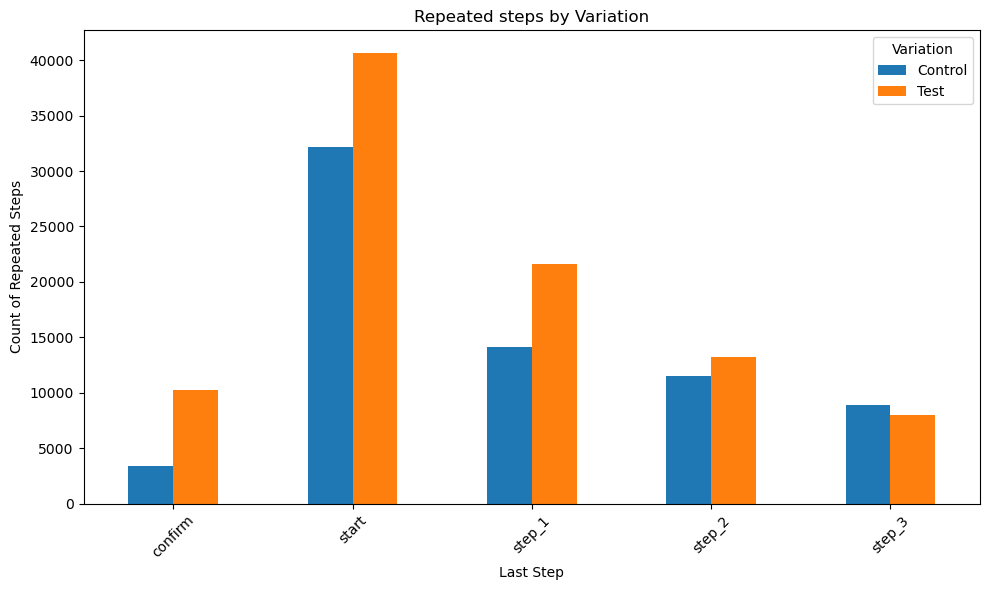

In [30]:
errors.unstack().plot(kind='bar', figsize=(10,6))
plt.title('Repeated steps by Variation')
plt.xlabel('Last Step')
plt.ylabel('Count of Repeated Steps')
plt.xticks(rotation=45)
plt.legend(title='Variation')
plt.tight_layout()
plt.show()

In [33]:
df = pd.read_csv("/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/raw/df_final_demo.txt")
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [37]:
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [41]:
df.to_csv("/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_final_demo.csv", index=False)